In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
BankChurners = "BankChurners.csv"
df = pd.read_csv(BankChurners)
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [67]:
# copy attrited customers df
cr_df = df.copy()

# calculate overall churn rate
churned_customers = cr_df[cr_df['Attrition_Flag'] == 'Attrited Customer']
churn_rate = len(churned_customers) / len(cr_df) * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")

Overall Churn Rate: 16.07%


In [68]:
# Get all Attrited Customers
atc_df = df[df['Attrition_Flag'].str.contains('Attrited Customer')]
atc_df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,1438.3,0,1438.3,1.047,692,16,0.600,0.000,0.99616,0.003836
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,7882.0,605,7277.0,1.052,704,16,0.143,0.077,0.99780,0.002197
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,...,1438.3,808,630.3,0.997,705,19,0.900,0.562,0.99028,0.009720
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,...,15769.0,0,15769.0,1.041,602,15,0.364,0.000,0.99671,0.003294
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,34516.0,0,34516.0,0.763,691,15,0.500,0.000,0.99823,0.001771


In [69]:
# define the age groups
bins = [0, 17, 21, 29, 39, 49, 59, 69, float('inf')]
labels = ['0-17', '18-21', '22-29', '30-39', '40-49', '50-59', '60-69', '70+']

# copy attrited customers df
age_group_df = atc_df.copy()

# create new column with age groups
age_group_df = df[df['Attrition_Flag'].str.contains('Attrited Customer')].copy()
age_group_df.loc[:, 'Age_Group'] = pd.cut(age_group_df['Customer_Age'], bins=bins, labels=labels)

# count the number of customers in each age group
group_counts = age_group_df['Age_Group'].value_counts(sort=False)
group_counts

0-17       0
18-21      0
22-29     17
30-39    261
40-49    772
50-59    506
60-69     71
70+        0
Name: Age_Group, dtype: int64

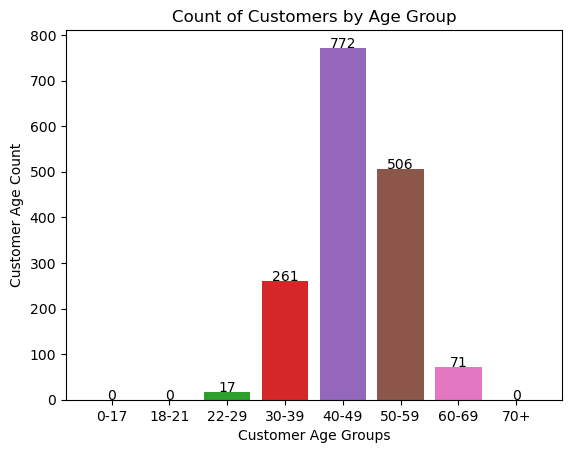

In [70]:
# define colors for each age group
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

# create bar chart
fig, ax = plt.subplots()
ax.bar(group_counts.index, group_counts.values, color=colors)
ax.set_title('Count of Customers by Age Group')
ax.set_xlabel('Customer Age Groups')
ax.set_ylabel('Customer Age Count')

# add labels to bars
for i, v in enumerate(group_counts.values):
    ax.text(i, v+0.5, str(v), ha='center')

plt.show()

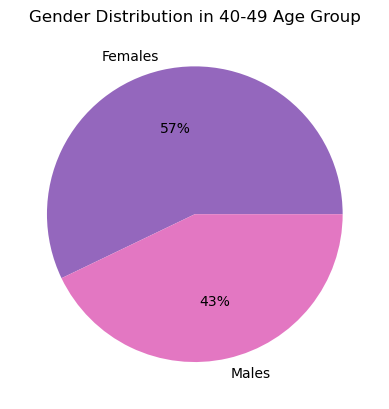

In [71]:
# filter age_group_df for only customers in 40-49 age group
age_group_40_49_df = age_group_df[age_group_df['Age_Group'] == '40-49']

# count number of males and females in the 40-49 age group
gender_counts = age_group_40_49_df['Gender'].value_counts()
gender_counts

# create pie chart
fig, ax = plt.subplots()
ax.pie(gender_counts.values, labels=['Females', 'Males'], colors=['#9467bd', '#e377c2'], autopct='%1.0f%%')
ax.set_title('Gender Distribution in 40-49 Age Group')

plt.show()

In [72]:
# create new column with age groups
cr_bins = [0, 17, 21, 29, 39, 49, 59, 69, float('inf')]
cr_labels = ['0-17', '18-21', '22-29', '30-39', '40-49', '50-59', '60-69', '70+']
cr_df.loc[:, 'Age_Group'] = pd.cut(cr_df['Customer_Age'], bins=cr_bins, labels=cr_labels)

# filter out zero-length arrays
cr_df = cr_df.loc[cr_df['Attrition_Flag'].notnull()]

# group by age group and calculate churn rate
churn_rate_by_age = cr_df.groupby('Age_Group')['Attrition_Flag'].apply(lambda x: ((x == 'Attrited Customer').sum() / len(x) * 100) if len(x) > 0 else np.nan).reset_index(name='Churn_Rate')
print('Churn Rate by Age Group:')
print(churn_rate_by_age)

Churn Rate by Age Group:
  Age_Group  Churn_Rate
0      0-17         NaN
1     18-21         NaN
2     22-29    8.717949
3     30-39   14.177078
4     40-49   16.926113
5     50-59   16.877919
6     60-69   13.396226
7       70+    0.000000


In [73]:
# create new column with gender
cr_df.loc[:, 'Gender_Group'] = cr_df['Gender']

# group by gender group and calculate churn rate
churn_rate_by_gender = cr_df.groupby('Gender_Group')['Attrition_Flag']\
    .apply(lambda x: ((x == 'Attrited Customer').sum() / len(x) * 100) if len(x) > 0 else np.nan)\
    .reset_index(name='Churn_Rate')
print('\nChurn Rate by Gender:')
print(churn_rate_by_gender)


Churn Rate by Gender:
  Gender_Group  Churn_Rate
0            F   17.357223
1            M   14.615223
